# Handling Missing Data for Advanced ML

Data Science, ML에서 data cleansing은 매우 중요

## 3 major types of missing values
1. Missing Completely At Random (MCAR)
2. Missing At Random (MAR)
3. Missing Not At Random (MNAR)

### 1. Missing Completely At Random (MCAR)
: Missing value가 다른 변수들과 아무런 상관이 없는 경우

e.g.
- 컴퓨터로 입력되거나 응답자들이 질문에 대한 답을 고르지 않았을 때 or 전산오류

$\Rightarrow$ 이러한 데이터로 학습된 모델을 통한 **추론은 효과가 없다**.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rc('font', family='NanumGothic')
%matplotlib inline
# create a synthetic dataset

# measured predictors x1, x2
x1 = np.sort(np.random.uniform(-2.0, 3.0, 100))  # random real number
x2 = np.random.choice([0,1], size=(100,))  # random binary numbers

x = (x1, x2)
# measured response y
y = 2 * x1 + 1
y = y + np.random.normal(0, 1, 100)

# sample
pd.DataFrame({'x1': x1, "x2": x2, "y": y}).head()

,x1,x2,y
0,-1.932683,1,-2.707330
1,-1.881978,1,-2.366566
2,-1.874048,1,-3.560402
3,-1.852989,0,-3.569084
4,-1.836187,0,-3.371269


Text(0.5, 1.0, 'Missing Completely at Random (MCAR)')

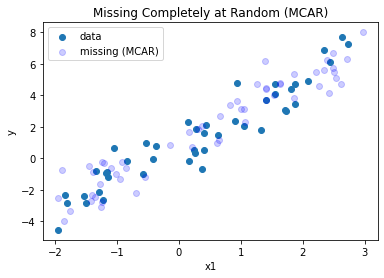

In [2]:
# To illustrate MCAR, remove half of the values for x1

## randomly mark half of x1 smaples as missing MCAR
# independed of any information recorded
idx_mcar = np.random.choice([0,1], size=(100,)) == 1  # ndarray (100,), values are boolean type

plt.scatter(x1[~idx_mcar], y[~idx_mcar], label = 'data')  # ~idx_mcar == False
plt.scatter(x1[idx_mcar], y[idx_mcar], label='missing (MCAR)', color="blue", alpha=0.2)  # idx_mcar == True
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.title("Missing Completely at Random (MCAR)")

red mark(MCAR)은 $x_1$의 값이나 다른 어떤 변수의 값과 관련이 없다. 

$y = 2x_1 + 1 + np.random.noraml(0,1,100)$

## Give Example from Titinic Data

Text(0.5, 1.0, 'Total Missing Value (%)')

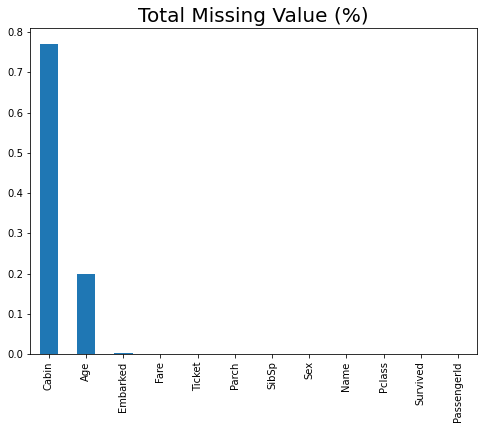

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize=(8,6), fontsize=10)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.title("Total Missing Value (%)", fontsize=20)

Text(0.5, 1.0, 'Correlation with Missing Values')

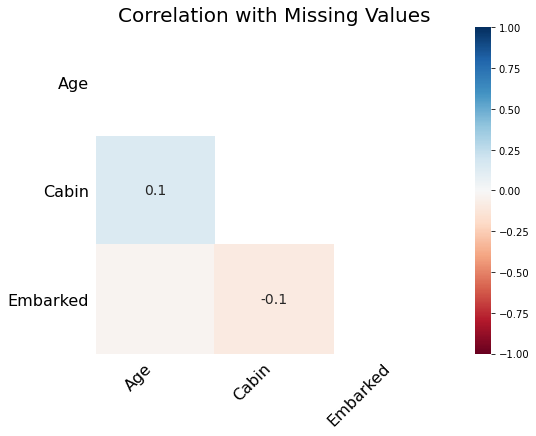

In [4]:
import missingno as msno

missingdata_df = train_df.columns[train_df.isnull().any()].tolist()
msno.heatmap(train_df[missingdata_df], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize=20)

#### 결측치끼리 어떠한 상관 관계도 없다. 위와 같은 경우 결측치의 유형 중 MCAR에 해당한다.

### 2. Missing At Random (MAR)
: 결측값 발생이 다른 변수에 따라 조건부로 발생하는 경우

e.g.
 - 남성들이 특정 설문(육아 휴직을 간적이 있는가?)에 응답하지 않은 경우 $\rightarrow$ 성별(남, 녀)이 응답(yes, no / 1, 0)에 영향

Text(0.5, 1.0, 'dependent predictor - measured')

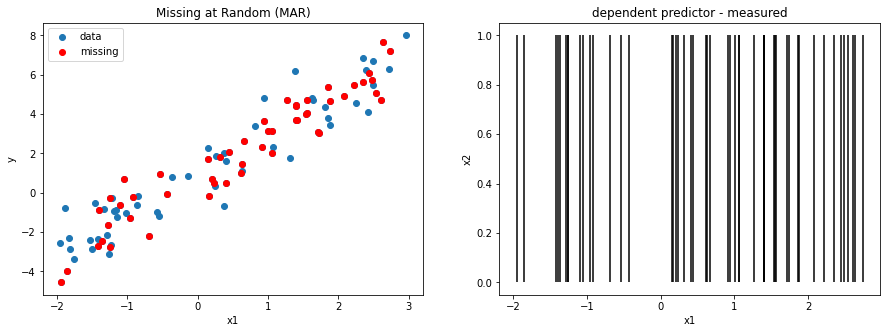

In [5]:
# Missing at Random (MAR)

# randomly mark half of x1 samples as missing MAR
# depending on value of recorded predictor x2

idx_mar = x2 == 1
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(x1, y, label='data')
ax[0].scatter(x1[idx_mar], y[idx_mar], label='missing', color='red')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].set_title('Missing at Random (MAR)')

ax[1].vlines(x1[x2 == 1], 0, 1, color='black')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('dependent predictor - measured')

red-marked(MAR)은 $x_2$에 종속적이다. $x_2$가 1이면 $x_1$는 missing value이다.

### 3. Missing Not At Random (MNAR)
: 누락된 값이 다른 (관측되지 않은)변수와 연관이 있는 경우 (MCAR, MAR 아닌 경우)

e.g.
- 설문 조사에서 부정행위한 사람은 부정 행위를 한 적이 있는지 묻는 질문에 응답할 가능성이 적다. 
- 우울감이 심한 사람이 우울감 때문에 설문에 응답하지 않는 경우

44


Text(0.5, 1.0, 'dependent preditor - not measured')

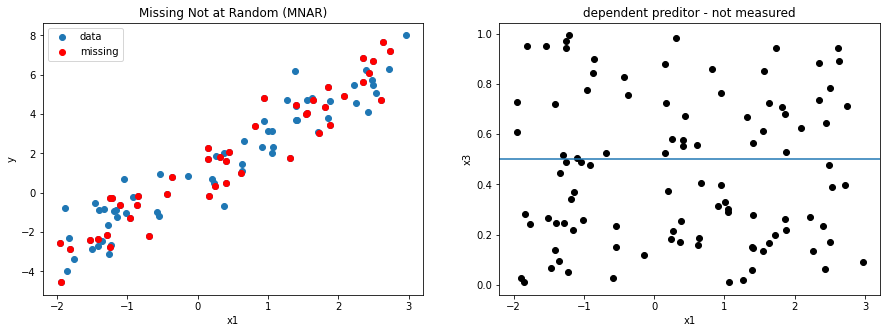

In [6]:
### Missing Not at Random (MNAR)

# randomly mark half of x1 samples as missing MNAR
# depending on unrecorded predictor x3
x3 = np.random.uniform(0, 1, 100)  # x3는 측정되지 않은 가상의 변수 (실수형 난수 발생)
idx_mnar = x3 > .5  
print(len(x3[idx_mnar == True]))

fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].scatter(x1, y, label="data")
ax[0].scatter(x1[idx_mnar], y[idx_mnar], label='missing', color='red')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].set_title("Missing Not at Random (MNAR)")
ax[1].scatter(x1, x3, color="black")
ax[1].axhline(.5, -3, 3)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[1].set_title('dependent preditor - not measured')

## 3 Main Approaches to Compensate for Missing Values
일반적으로 데이터가 MCAR, MAR, MNAR인지 판단이 힘들다.
**실제로는 MAR 가정이 합리적이다.**

#### 1. Imputation using **0, mean, median** (for quantitative variables) or **most frequent value** (for categorical variables)


#### 2. Imputation using a **randomly selected value**

: 변수에서 무작위로 값을 선택하여 대치


#### 3. Imputation with a **model**

: 다른 관측된 독립 변수(예측 변수, 설명 변수)를 기반으로 한 모델로 부터의 예측된 값들로 대치
    
    
- 3.1 Model-based imputation with uncertainty
    
: 다른 feature를 이용한 예측 값으로 대치하는 방법
    
    
- 3.2 Model-based progressive imputation
    
: 이전에 대치되었던 결측값들을 사용해 다른 결측값을 예측하는 방법
    
#### 4. Additional methods: Stochastic Regression, Multiple Imputation, Datawig, Hot-Deck imputation, Extrapolation, Interpolation, Listwise Deletion

## A Practical Guide for Hadling Missing Values

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pima_df = pd.read_csv("data/missing_data_pima-indians-diabetes.csv")

response = "Outcome"
predictors = pima_df.columns.difference([response]).values

pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.853403,120.922775,69.111257,20.537958,80.070681,31.998429,0.472712,33.248691
std,3.374327,32.039835,19.403339,15.970234,115.431087,7.899591,0.331981,11.771901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.375500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies: 임신 횟수
- Glucose: 포도당 농도 (경구 포도당 내성 검사에서의)
- BloodPressure: 확장기 혈압(최소 혈압)(mm Hg)
- SkinThickness: 피부 두께 (삼두)(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: Body mass index
- DiabetesPedigreeFunction: 당뇨병 내력
- Age: 나이(years)
- Outcome (1 for early onset of diabetes within five years, 0 for not)

In [9]:
# Convert Features to Korean
pima_df.columns = ["임신 횟수", "포도당 농도", "혈압", "피부 두께", "인슐린", "BMI", "당뇨병 내력", "나이", "Outcome"]
pima_df

,임신 횟수,포도당 농도,혈압,피부 두께,인슐린,BMI,당뇨병 내력,나이,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1\
760,2,88,58,26,16,28.4,0.766,22,0\
761,9,170,74,31,0,44.0,0.403,43,1\
762,9,89,62,0,0,22.5,0.142,33,0\


### First step: Properly flagging missing values

In [10]:
# Check how many missing values in pima_df
pima_df.isnull().sum(), pima_df.isna().sum()

(임신 횟수      0
 포도당 농도     0
 혈압         0
 피부 두께      0
 인슐린        0
 BMI        0
 당뇨병 내력     0
 나이         0
 Outcome    0
 dtype: int64,
 임신 횟수      0
 포도당 농도     0
 혈압         0
 피부 두께      0
 인슐린        0
 BMI        0
 당뇨병 내력     0
 나이         0
 Outcome    0
 dtype: int64)

"포도당 농도", "혈압", "피부 두께", "인슐린", "BMI" 는 0을 가질 수 없다. NaN, Null or None 대신 0으로 표기되어 있다. 

NaN으로 대치하지 않으면 나중에 분류할 때 문제가 있을 수 있다.

In [11]:
# build preprocessing function
def clean_data(df_raw, cols_with_zeros=['포도당 농도', '혈압',
                                       '피부 두께', '인슐린', 'BMI'],
                                       response=['Outcome']):
    df = df_raw.copy()
    
    # replace zero with NaN in features
    df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
    
    # remove \ and } from response
    df = df.replace(to_replace=r'\\|\}', value='', regex=True)
    
    # change response data type to int
    df[response] = df[response].astype('int')
    
    return df

pima_df_cleaned = clean_data(pima_df)
pima_df_cleaned.head()

,임신 횟수,포도당 농도,혈압,피부 두께,인슐린,BMI,당뇨병 내력,나이,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
print("Proportion of missing values")
missing_values_count = pima_df_cleaned.isna().sum()*100/pima_df_cleaned.shape[0]
features_with_missing_values = missing_values_count[missing_values_count>0].index.values
missing_values_count

Proportion of missing values


임신 횟수       0.000000
포도당 농도      0.654450
혈압          4.581152
피부 두께      29.581152
인슐린        48.560209
BMI         1.439791
당뇨병 내력      0.000000
나이          0.000000
Outcome     0.000000
dtype: float64

Text(0.5, 1.0, 'Total Missing Value (%)')

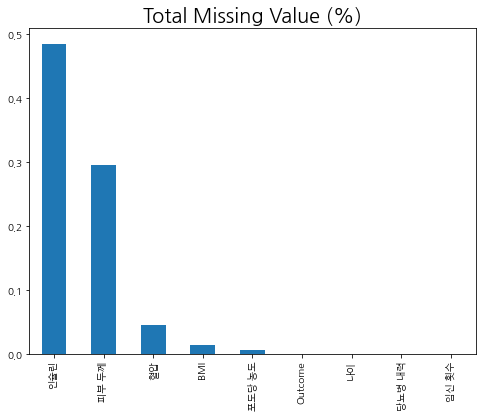

In [14]:
total = pima_df_cleaned.isnull().sum().sort_values(ascending=False)
percent = (pima_df_cleaned.isnull().sum() / pima_df_cleaned.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize=(8,6), fontsize=10)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.title("Total Missing Value (%)", fontsize=20)

### Second step: Statistical tests of Hypothesis (MAR, MCAR, MNAR)

In [15]:
pima_df[(pima_df["피부 두께"] == 0) & (pima_df["인슐린"] != 0)]

,임신 횟수,포도당 농도,혈압,피부 두께,인슐린,BMI,당뇨병 내력,나이,Outcome


"피부 두께"가 결측되면 "인슐린"도 결측

In [16]:
pima_df_cleaned[pima_df_cleaned["인슐린"].isna()].head()

,임신 횟수,포도당 농도,혈압,피부 두께,인슐린,BMI,당뇨병 내력,나이,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


/home/minsungkim/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minsungkim/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, 'Correlation with Missing Values')

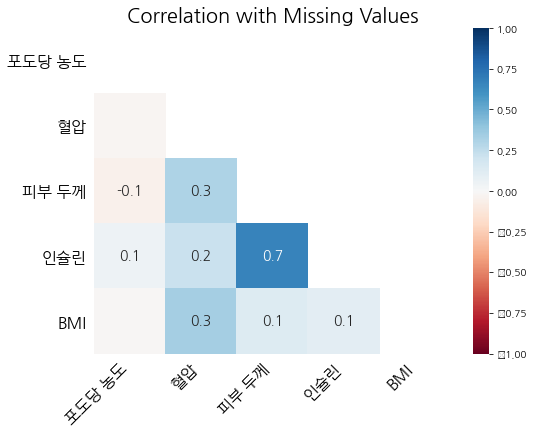

In [17]:
import missingno as msno

missingdata_df = pima_df_cleaned.columns[pima_df_cleaned.isnull().any()].tolist()
msno.heatmap(pima_df_cleaned[missingdata_df], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize=20)

"혈압" 누락되면 "피부 두께", "BMI"도 누락 확률이 증가한다.

### Third step: choose the most appropriate technique to handle missing values

#### Strategies for handling missing data

- Drop strategy
- Mean strategy
- Median strategy & most-frequent strategy
- Model-based strategy: uses the features without missing values for training kNN regression models
    - basic mode: Age, DiabetesPedigreeFunction, Outcome, Pregnancies (not NaN) 을 사용하여 남은 features을 예측
    - progressive mode: 주어진 feature 안의 missing values 채우고, 이 채워진 feature를 사용하여 다음 featrue를 예측
    
대치된 data는 선택적으로 0 ~ 1 사이로 정규화될 수 있다. regularized logistic regression을 사용한 분류의 performance를 향상시킨다.
 feature가 스케일 되지 않으면 수축 penalty는 잘못 계산될 수 있다.

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# function for KNN model-based imputation of missing values using features without NaN as predictors
def impute_model_basic(df):
    cols_nan = df.columns[df.isna().any()].tolist()  # '포도당 농도', '혈압', '피부 두께', '인슐린', 'BMI'
    cols_no_nan = df.columns.difference(cols_nan).values  # '임신 횟수', '당뇨병 내력', '나이', 'Outcome'
    for col in cols_nan:
        test_data = df[df[col].isna()]  # target data (Missing values)
        train_data = df.dropna()  # training data
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])  # .fit(training_data, target_data)
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
    return df

# function for KNN model-based imputation of missing values using features without NaN as predictors, 
# including progressively added imputed features
def impute_model_progressive(df):
    cols_nan = df.columns[df.isna().any()].tolist()
    cols_no_nan = df.columns.difference(cols_nan).values
    # '포도당 농도', '혈압', '피부 두께', '인슐린', 'BMI' 하나씩 채우고 채워진 값을 이용해 다음 Missing Value 채워
    while len(cols_nan) > 0:  
        col = cols_nan[0]
        test_data = df[df[col].isna()]
        train_data = df.dropna()
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
        cols_nan = df.columns[df.isna().any()].tolist()
        cols_no_nan = df.columns.difference(cols_nan).values
    return df

# function for imputing missing data according to a given impute_strategy:
#  drop_rows: drop all rows with one or more missing values
#  drop_cols: drop columns with one or more missing values
#  model_basic: KNN-model-based imputation with fixed predictors
#  model_progressive: KNN-model-based imputation with progressively added predictors
#  mean, median, most_frequent: imputation with mean, median or most frequent values
#
#  cols_to_standardize: if provided, the specified columns are scaled between 0 and 1, after imputation
def impute_data(df_cleaned, impute_strategy=None, cols_to_standardize=None): 
    df = df_cleaned.copy()
    if impute_strategy == 'drop_rows':
        df = df.dropna(axis=0)
    elif impute_strategy == 'drop_cols':
        df = df.dropna(axis=1)
    elif impute_strategy == 'model_basic':
        df = impute_model_basic(df)
    elif impute_strategy == 'model_progressive':
        df = impute_model_progressive(df) 
    else:
        arr = SimpleImputer(missing_values=np.nan,strategy=impute_strategy).fit(
            df.values).transform(df.values)
        df = pd.DataFrame(data=arr, index=df.index.values, columns=df.columns.values)
    if cols_to_standardize != None:
        cols_to_standardize = list(set(cols_to_standardize) & set(df.columns.values))
        df[cols_to_standardize] = df[cols_to_standardize].astype('float')
        df[cols_to_standardize] = pd.DataFrame(data=MinMaxScaler().fit(
            df[cols_to_standardize]).transform(df[cols_to_standardize]), 
                                             index=df[cols_to_standardize].index.values,
                                             columns=df[cols_to_standardize].columns.values)
    return df

## Logistic regression with missing data
특정한 대치 전략을 적용한 후 cleaned data를 logistic regression model에 fit한다.
- dropping rows with missing values: 결측치가 있는 행을 드랍
- dropping columns with missing values: 결측치가 있는 열을 드랍
- imputing missing values with column mean: 결측치를 열의 평균으로 대치
- imputing missing values with model-based prediction: 결측치를 모델 기반 예측으로 대치
- imputing missing values with progressive model-based prediction: 결측치를 progressive 모델 기반 예측으로 대치

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer

# function for handling missing values 
# and fitting logistic regression on clean data
def logistic_regression(data, impute_strategy=None,
                        cols_to_standardize=None,
                        test_size=0.25,
                        random_state=9001):
    start = timer()
    
    # store original columns
    # ['BMI', '나이', '당뇨병 내력', '인슐린', '임신 횟수', '포도당 농도', '피부 두께', '혈압']
    original_columns = data.columns.difference(['Outcome'])
    df_imputed = impute_data(data, impute_strategy, cols_to_standardize)
    train_data, test_data = train_test_split(df_imputed, test_size=test_size,
                                             random_state=random_state)
    
    # note which predictor columns were dropped or kept
    kept_columns = df_imputed.columns.difference(['Outcome'])
    dropped_columns = original_columns.difference(df_imputed.columns)
    original_columns = original_columns.difference(['Outcome'])
    
    # prepare tensors
    X_train = train_data.drop(columns=['Outcome'])
    y_train = train_data['Outcome']
    X_test = test_data.drop(columns=['Outcome'])
    y_test = test_data['Outcome']
    
    # model training
    logistic_model = LogisticRegressionCV(cv=10, penalty='l2', max_iter=1000).fit(
        X_train, y_train)
    
    # model evaluation
    train_score = accuracy_score(y_train, logistic_model.predict(X_train))
    test_score = accuracy_score(y_test, logistic_model.predict(X_test))
    duration = timer() - start
    print("Classification rate on training data: {}".format(train_score))
    print("Classification rate on test data: {}".format(test_score))
    print("Execution time: {}".format(duration))
    
    return {
        'imputation strategy': impute_strategy,
        'standardized': cols_to_standardize!=None,
        'model': logistic_model,
        'train score': train_score,
        'test score': test_score,
        'execution time (s)': duration
    }
  
# list to store models' performance  
lr_results = []

# prepare data
pima_df_cleaned = clean_data(pima_df)
cols_to_standardize=['나이','BMI','혈압','포도당 농도','인슐린','임신 횟수','피부 두께','당뇨병 내력']

# fit logistic regression for each imputation strategy
# with and without standardizing features
for impute_strategy in ['drop_rows', 'mean', 'model_basic', 'model_progressive']:
    for cols in [None, cols_to_standardize]:
        result = logistic_regression(pima_df_cleaned, impute_strategy=impute_strategy, cols_to_standardize=cols)
        lr_results.append(result)

# display logistic regression performance
lr_results_df = pd.DataFrame(lr_results)
lr_results_df.drop(['model'], axis=1).drop_duplicates()

Classification rate on training data: 0.8225255972696246
Classification rate on test data: 0.7040816326530612
Execution time: 1.1853753719478846
Classification rate on training data: 0.825938566552901
Classification rate on test data: 0.6938775510204082
Execution time: 0.25222541904076934
Classification rate on training data: 0.7731239092495636
Classification rate on test data: 0.7591623036649214
Execution time: 1.2297665663063526
Classification rate on training data: 0.7661431064572426
Classification rate on test data: 0.7591623036649214
Execution time: 0.26942451065406203
Classification rate on training data: 0.7696335078534031
Classification rate on test data: 0.7801047120418848
Execution time: 1.3836061931215227
Classification rate on training data: 0.7713787085514834
Classification rate on test data: 0.774869109947644
Execution time: 0.3033324643038213
Classification rate on training data: 0.7818499127399651
Classification rate on test data: 0.7696335078534031
Execution time: 1.34

,imputation strategy,standardized,train score,test score,execution time (s)
0,drop_rows,False,0.822526,0.704082,1.185375
1,drop_rows,True,0.825939,0.693878,0.252225
2,mean,False,0.773124,0.759162,1.229767
3,mean,True,0.766143,0.759162,0.269425
4,model_basic,False,0.769634,0.780105,1.383606
5,model_basic,True,0.771379,0.774869,0.303332
6,model_progressive,False,0.781850,0.769634,1.345238
7,model_progressive,True,0.787086,0.764398,0.309350


### Effect of dropping strategy on accuracy
: 결측값이 있는 행이나 열을 삭제하면 response variable에 중대한 영향을 미칠 수 있는 중요한 정보가 손실된다.

그 결과 training data에 overfitting되고 test data의 예측 성능이 감소, model_basic, model_progressive의 test_score에 비해 낮다.

### Effect of mean / model imputation on accuracy
: 평균을 이용한 대치는 overfitting을 줄이고 test data에 대한 예측을 향상시킨다.

누락 된 데이터를 대치 할 때 모델 기반을 사용할 때 분류가 가장 좋습니다. 이는 k-nearest neighbors을 누락 된 데이터의 대체로 사용할 때 데이터의 원래 분산에 더 잘 접근하기 때문입니다.

### Effect of imputation on training time
계산 복잡도는 대치, logistic regression 모델 피팅, 예측의 총 시간으로 평가된다.

model-based 접근에 대한 실행 시간은 가장 높다 정규화되지 않았을 때. 가장 가까운 이웃들에 대한 유클리디안 거리를 계산하는 것은 데이터의 평균을 계산하는 것보다 더 많은 실행 시간을 필요로 한다. 

### Effect of imputation on inference

In [20]:
# get index of strategies
lr_results_df = pd.DataFrame(lr_results)
strategies = lr_results_df['imputation strategy']

# get a boolean array where True => standardized
standardized = lr_results_df['standardized']
st = lambda s: ' standardized' if s else ''
coefs_ = {}
for key, value in enumerate(strategies):
    if value == 'drop_cols':
        # skip
        pass
    else:
        strategy = value + st(standardized[key])
        coefs_[strategy] = lr_results_df['model'][key].coef_[0]
coef_df = pd.DataFrame(data=coefs_, index=predictors)
coef_df.T

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
drop_rows,0.042894,0.045141,0.005913,-0.001516,-0.002136,0.082871,0.885856,0.031678
drop_rows standardized,0.735836,6.392153,0.557034,-0.077534,-1.753578,4.024592,2.227690,1.886384
mean,0.152794,0.039292,-0.010179,-0.008114,-0.000724,0.104550,0.978277,0.015349
mean standardized,2.518595,5.928161,-0.840922,-0.511167,-0.451331,4.821429,2.281098,0.915101
model_basic,0.149625,0.038517,-0.008356,0.000333,-0.000327,0.095849,0.948578,0.014541
model_basic standardized,2.544475,5.990200,-0.754568,0.053903,-0.275382,4.704462,2.339150,0.885368
model_progressive,0.151302,0.041058,-0.013029,-0.000465,-0.001384,0.101240,0.961410,0.015520
model_progressive standardized,2.584038,6.419168,-1.223196,-0.042236,-1.187678,5.013827,2.384934,0.948373


위 계수들은 각 독립변수들이 당뇨 발생의 가능도에 얼마나 영향을 미치는지 보여준다.

양수 값들은 당뇨 발생에 유리한 요인을 보여준다.

0에 가까운 값들은 당뇨 발생에 큰 관련이 없다.

위 테이블은 대치 전략 적용 후 추론된 계수를 보여준다.

- 전체적으로 정규화된 계수들은 더 크다.
- 행/열이 제거되었을 때, 평균이나, 모델로 대치되었을 때 보다 더 크게 변경된다.
- 인슐린에 대한 계수들은 대치 방법들 사이에 크게 변하지 않았다. 인슐인은 모든 독립변수들 사이에서 가장 높은 비율의 missing values를 갖고 있었다. 이것으로 인슐린은 MCAR일 것이라는 것을 시사한다.

아래의 표는 결측 데이터를 행으로 제거한 후 얻은 계수들의 크기에 대한 평균, 대치 및 모델 기반 대치의 효과를 비교합니다. 

In [21]:
coef_perc_df = coef_df.copy()
cols = coef_df.columns.difference(['drop_rows']).values
for col in cols:
    coef_perc_df[col] = np.round(100*(coef_df[col]/coef_df['drop_rows']-1))
coef_perc_df[['drop_rows','mean','model_basic','model_progressive']]

,drop_rows,mean,model_basic,model_progressive
Age,0.042894,256.0,249.0,253.0
BMI,0.045141,-13.0,-15.0,-9.0
BloodPressure,0.005913,-272.0,-241.0,-320.0
DiabetesPedigreeFunction,-0.001516,435.0,-122.0,-69.0
Glucose,-0.002136,-66.0,-85.0,-35.0
Insulin,0.082871,26.0,16.0,22.0
Pregnancies,0.885856,10.0,7.0,9.0
SkinThickness,0.031678,-52.0,-54.0,-51.0


첫 번째 열은 누락 된 값이있는 행이 제거 된 데이터에 대해 학습 된 로지스틱 모델에 대한 계수 추정값이 표시됩니다.

다른 열은 드롭 전략과 비교하여 결 측값을 대치 한 후 계수 값의 백분율 변경을 보여줍니다.

연령, 혈압 및 내력은 행 삭제와 평균 / 모델 기반 대치 사이에서 가장 높은 백분율 변화를 보입니다.

드롭 전략은 일반적으로 황금 방법이 아닙니다.

## Conclusion

- 데이터를 정리하고 누락 된 값을 처리하는 것이 Machine Learning 알고리즘의 성능 향상 가능

- MCAR, MAR, MNAR 유형의 결측 데이터를 구별하는 것은 추론 및 예측에 상당한 영향을 미칠 수 있기 때문에 필수적

- 누락 된 데이터를 처리하는 완벽한 방법은 없지만 사용 가능한 다른 방법을 알고 있어야합니다.